# Buffon's Needle Simulation in Python

Simulation created by Mikayel Grigoryan

In [ ]:
import numpy as np
from typing import List, Tuple

In [ ]:
# This function simulates Buffon's Needle Problem to estimate the value of pi.
def buffon_needle_simulation(
    N: int,  # Number of needles we are going to drop (N)
    L: float,  # Length of a single needle (L), as seen in slide page 12
    D: float,   # Distance between parallel lines (D), as seen in slide page 12
    debug = False
) -> Tuple[float, List[int]]:
    PI = np.pi  # Value of pi (used for generating random angles)
    # Edge case handling: Ensure needle length is less than or equal to line spacing
    if L > D:
        raise ValueError("Needle length must be less than or equal to line spacing.")

    # A simple function for prettily dividing the lines
    def divider():
      if debug: print("-" * 100)

    # Random variable X: Distance from the midpoint of the needle to the nearest line
    # As described in slide page 12, X is uniformly distributed over [0, D/2].
    rand_X__distance_to_nearest_line = np.random.uniform(0, D / 2, N)
    if debug: print("X (distances):", rand_X__distance_to_nearest_line)
    divider()

    # Random variable θ: Angle between the needle and the vertical direction
    # As described in slide page 12, θ (rand. var. Y) is uniformly distributed
    # over [0, π/2].
    rand_Y__theta__angle_with_vertical = np.random.uniform(0, PI / 2, N)
    if debug: print("Y (angles):",rand_Y__theta__angle_with_vertical)
    divider()

    # A needle crosses a line if the projection of half its length exceeds its
    # distance to the nearest line. This corresponds to the condition in slide
    # page 12: X < (L / 2) * cos(θ).
    #
    # Here, we calculate the perpendicular projection of half the needle's length,
    # I refered to page 13's drawing for this part.
    hypotenuse_projections = (L / 2) * np.cos(rand_Y__theta__angle_with_vertical)
    if debug: print("Projections (L/2 * cos(θ)):", hypotenuse_projections)
    divider()

    # Determine whether each needle crosses a line based on the condition: X < (L / 2) * cos(θ).
    # Convert the boolean result to integers (1 for crossing, 0 otherwise).
    crossings__indicator_variable = (rand_X__distance_to_nearest_line < hypotenuse_projections)
    if debug: print("Did it cross? (boolean):", crossings__indicator_variable)
    divider()

    # Making sure to convert t/f to binary 0/1
    crossings__indicator_variable = crossings__indicator_variable.astype(int)
    if debug: print("Did it cross? (0/1):    ", crossings__indicator_variable)
    divider()

    # Count the total number of crossings (sum of indicator variables), since
    # we have tossed multiple needles
    total_crossings = np.sum(crossings__indicator_variable)
    if total_crossings == 0:
      # Handle the edge case where no crossings occur
        if debug: print("No crossings occurred. Try increasing the number of needles.")
        divider()
        return None, crossings__indicator_variable

    # Estimate π using the formula derived in slide page 12:
    # pi ≈ (2 * L * N) / (D * total_crossings)
    estimated_pi = (2 * L * N) / (D * total_crossings)
    return estimated_pi, crossings__indicator_variable

In [ ]:
np.random.seed(999)

# Simulation parameters
N = 10_000      # Number of needles to drop
L = 1.0      # Length of the needle (L)
D = 2.0       # Distance between parallel lines (D)
buffon_needle_simulation(N, L, D)

(np.float64(3.1426775612822127), array([0, 0, 1, ..., 0, 0, 0]))

In [ ]:
np.random.seed(999)


# Same exepriment but with debug output enabled
buffon_needle_simulation(N, L, D, True)

X (distances): [0.80342804 0.5275223  0.11911147 ... 0.86425596 0.79368696 0.47352916]
----------------------------------------------------------------------------------------------------
Y (angles): [0.41090867 0.11775365 1.16754004 ... 0.34046948 0.34049909 0.88920153]
----------------------------------------------------------------------------------------------------
Projections (L/2 * cos(θ)): [0.45837912 0.49653752 0.19620775 ... 0.471299   0.47129405 0.31501615]
----------------------------------------------------------------------------------------------------
Did it cross? (boolean): [False False  True ... False False False]
----------------------------------------------------------------------------------------------------
Did it cross? (0/1):     [0 0 1 ... 0 0 0]
----------------------------------------------------------------------------------------------------


(np.float64(3.1426775612822127), array([0, 0, 1, ..., 0, 0, 0]))

# Graphing the Approximations

In [ ]:
import matplotlib.pyplot as plt

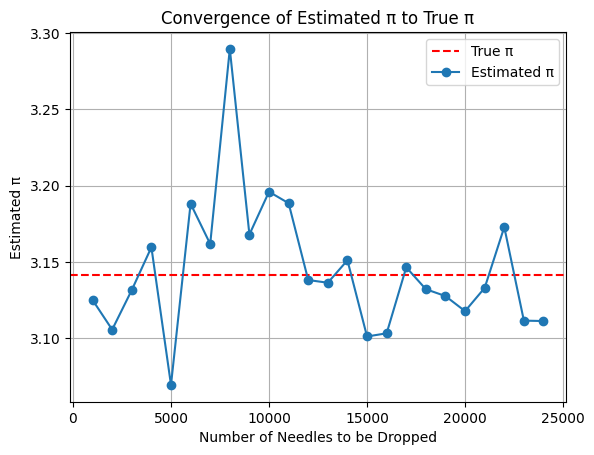

In [ ]:
# Important: this is the seed to guarantee reproduction of my results
np.random.seed(999)

# Plot the true value of pi
plt.axhline(y=np.pi, label='True π', color='red', linestyle='--')
plt.legend()

# Number of needles dropped to simulate in increments of 1,000
X_values = range(1_000, 25_000, 1_000)
 # To store the estimated values of pi for N needle drops
Y_values_cosine_default = []

# Parameters for Buffon's Needle Problem
L = 1.0  # Length of the needle
D = 2.0  # Distance between parallel lines

# Simulate Buffon's Needle Problem for increasing numbers of needles
for N in X_values:
    estimated_pi, _ = buffon_needle_simulation(N, L, D)
    Y_values_cosine_default.append(estimated_pi)

# Plot the results
plt.plot(X_values, Y_values_cosine_default, label='Estimated π', marker='o')
plt.xlabel('Number of Needles to be Dropped')
plt.ylabel('Estimated π')
plt.title('Convergence of Estimated π to True π')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Modified function using sine
def buffon_needle_simulation__sine(
    N: int,
    L: float,
    D: float,
    debug = False
) -> Tuple[float, List[int]]:
    PI = np.pi
    if L > D:
        raise ValueError("Needle length must be less than or equal to line spacing.")

    def divider():
      if debug: print("-" * 100)

    rand_X__distance_to_nearest_line = np.random.uniform(0, D / 2, N)
    if debug: print("X (distances):", rand_X__distance_to_nearest_line)
    divider()

    rand_Y__theta__angle_with_vertical = np.random.uniform(0, PI / 2, N)
    if debug: print("Y (angles):",rand_Y__theta__angle_with_vertical)
    divider()

    ######################################↓↓↓ The only change was made here for this function
    hypotenuse_projections = (L / 2) * np.sin(rand_Y__theta__angle_with_vertical)
    if debug: print("Projections (L/2 * sin(θ)):", hypotenuse_projections)
    divider()
    ###############################################################################

    crossings__indicator_variable = (rand_X__distance_to_nearest_line < hypotenuse_projections)
    if debug: print("Did it cross? (boolean):", crossings__indicator_variable)
    divider()

    crossings__indicator_variable = crossings__indicator_variable.astype(int)
    if debug: print("Did it cross? (0/1):    ", crossings__indicator_variable)
    divider()

    total_crossings = np.sum(crossings__indicator_variable)
    if total_crossings == 0:
        if debug: print("No crossings occurred. Try increasing the number of needles.")
        divider()
        return None, crossings__indicator_variable

    estimated_pi = (2 * L * N) / (D * total_crossings)
    return estimated_pi, crossings__indicator_variable

Total error (default implementation): 0.8683375515228131
Total error (sine implementation): 0.5479753803643685


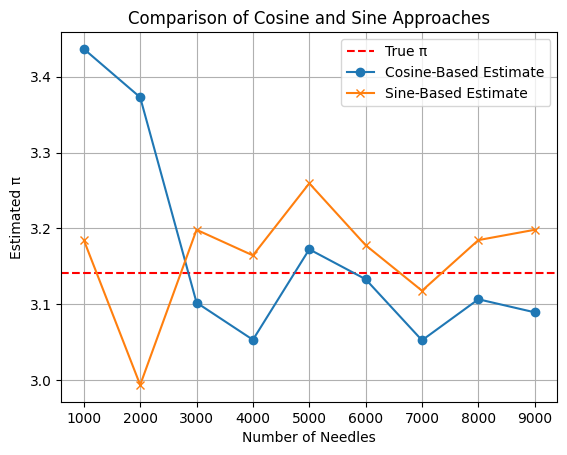

In [ ]:
# np.random.seed(999)  # I've set the seed for reproducibility

# Plotting the constant pi line
plt.axhline(y=np.pi, label='True π', color='red', linestyle='--')

# Parameters
L = 1.0  # Needle length
D = 2.0  # Distance between lines
X_values = range(1_000, 10_000, 1_000)  # Number of needles

# Run simulations
Y_values_cosine = []
Y_values_sine = []

for num_needles in X_values:
    # Cosine-based simulation
    estimated_pi_cosine, _ = buffon_needle_simulation(num_needles, L, D)
    Y_values_cosine.append(estimated_pi_cosine)

    # Sine-based simulation
    estimated_pi_sine, _ = buffon_needle_simulation__sine(num_needles, L, D)
    Y_values_sine.append(estimated_pi_sine)

# Plot results
plt.plot(X_values, Y_values_cosine, label='Cosine-Based Estimate', marker='o')
plt.plot(X_values, Y_values_sine, label='Sine-Based Estimate', marker='x')


plt.xlabel('Number of Needles')
plt.ylabel('Estimated π')

plt.title('Comparison of Cosine and Sine Approaches')
plt.legend()
plt.grid()

# Calculate absolute errors
errors_cosine = [np.abs(y - np.pi) for y in Y_values_cosine]
errors_sine = [np.abs(y - np.pi) for y in Y_values_sine]

print("Total error (default implementation):", np.sum(errors_cosine))
print("Total error (sine implementation):", np.sum(errors_sine))

plt.show() # print the errors and only then show the graph

# Cosine vs Sine Implementation Benchmark

In [ ]:
# The number of times to run the simulation with the previous parameters
N_iterations = 100_000

# Parameters
L = 1.0  # Needle length
D = 2.0  # Distance between lines
X_values = range(1_000, 10_000, 1_000)  # Number of needles

cosine_errs = []
sine_errs = []

for _ in range(N_iterations):
  # Run simulations
  Y_values_cosine = []
  Y_values_sine = []

  for num_needles in X_values:
      # Cosine-based simulation
      estimated_pi_cosine, _ = buffon_needle_simulation(num_needles, L, D)
      Y_values_cosine.append(estimated_pi_cosine)

      # Sine-based simulation
      estimated_pi_sine, _ = buffon_needle_simulation__sine(num_needles, L, D)
      Y_values_sine.append(estimated_pi_sine)

      # Calculate absolute errors
      errors_cosine = np.sum([np.abs(y - np.pi) for y in Y_values_cosine])
      errors_sine = np.sum([np.abs(y - np.pi) for y in Y_values_sine])

      cosine_errs.append(errors_cosine)
      sine_errs.append(errors_sine)

print("Total error (default implementation):", np.sum(cosine_errs))
print("Total error (sine implementation):", np.sum(sine_errs))

Total error (default implementation): 322484.14342832135
Total error (sine implementation): 322521.44251078536


In [ ]:
print("Accuracy difference")
1 - (322484.14342832135 / 322521.44251078536)

Accuracy difference


0.00011564838037947389